In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = load_breast_cancer()

In [3]:
print(data.keys())
print(data['target_names'])
print(data['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
df1 = pd.DataFrame(data['data'], columns=data['feature_names'])

In [5]:
sc = StandardScaler()
sc.fit(df1)
scaled_data = sc.transform(df1)

In [6]:
principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)

In [7]:
print(x.shape)

(569, 3)


In [8]:
print(principal.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
 [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
   0.00273384 -0.02556354 -0.04023994 -0.02257409  0.26848139  0.37463367
   0.26664537  0.21600653  0.30883898  0.15477972  0.17646374  0.22465757
   0.28858429  0.21150376 -0.04750699

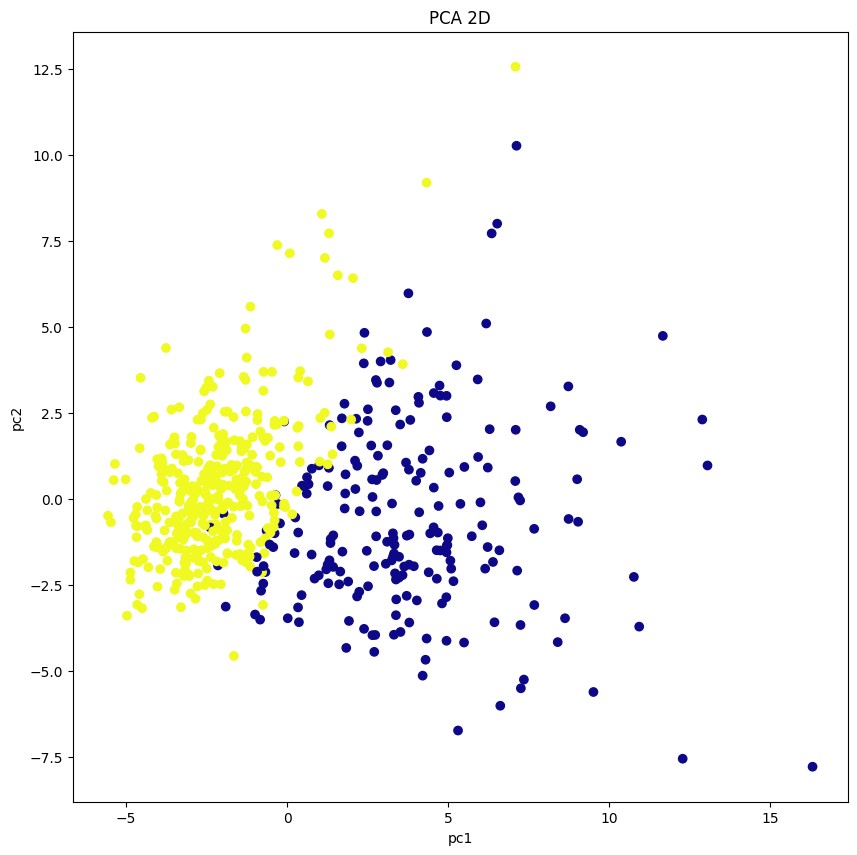

In [9]:
plt.figure(figsize=(10, 10))
plt.title('PCA 2D')
plt.scatter(x[:, 0], x[:, 1], c=data['target'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

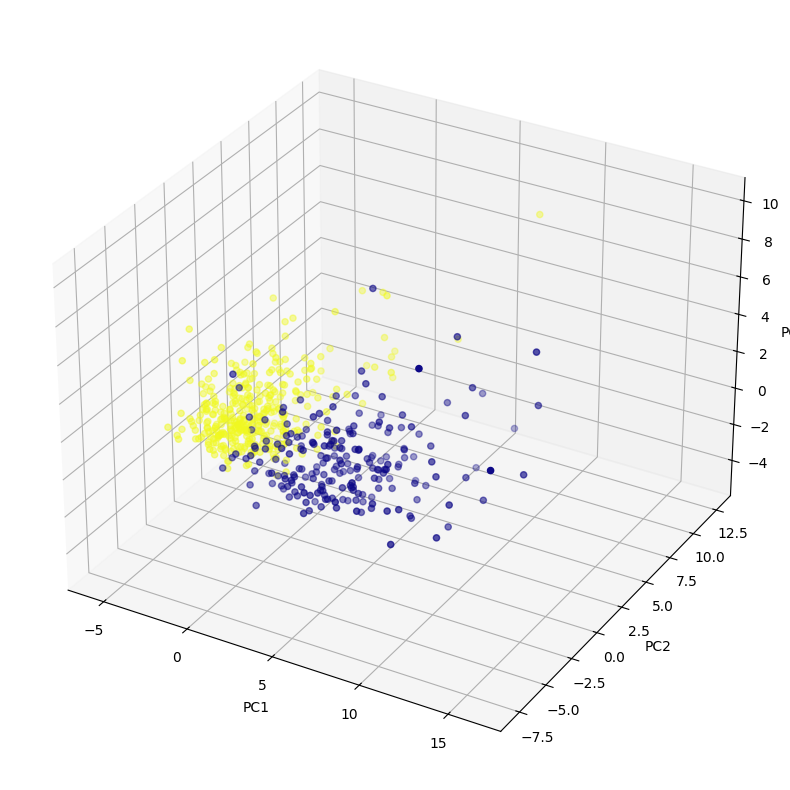

In [ ]:
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x[:, 0], x[:, 1], x[:, 2], c=data['target'], cmap='plasma')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)
plt.show()

In [11]:
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]
